In [2]:
import os
import datetime
import numpy as np
import netCDF4
import emodnetchemistry
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

## Files and directories

In [3]:
datadir = "/media/ctroupin/My Passport/data/EMODnet/Eutrophication/Split/"
datafile = os.path.join(datadir, "NorthSea_Water_body_dissolved_oxygen_concentration.nc")
residualdir = "/media/ctroupin/My Passport/data/EMODnet/Eutrophication/Residuals/All/"
residualfile = os.path.join(residualdir, "NorthSea_Water_body_dissolved_oxygen_concentration.csv")
os.path.isfile(residualfile) & os.path.isfile(datafile)

True

## Read data

In [4]:
# Original data file
lon0, lat0, depth0, years0, months0 = emodnetchemistry.read_coords_time_nc(datafile)

(-0.1, 1.0)

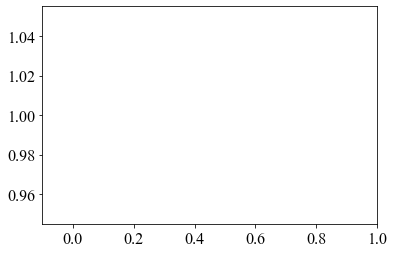

In [7]:
plt.plot(0., 1.)
plt.xlim(-0.1, 1.)

In [5]:
# Residuals
lon1, lat1, depth1, years1, months1 = emodnetchemistry.read_coords_time(residualfile)

NameError: name 'datetime' is not defined

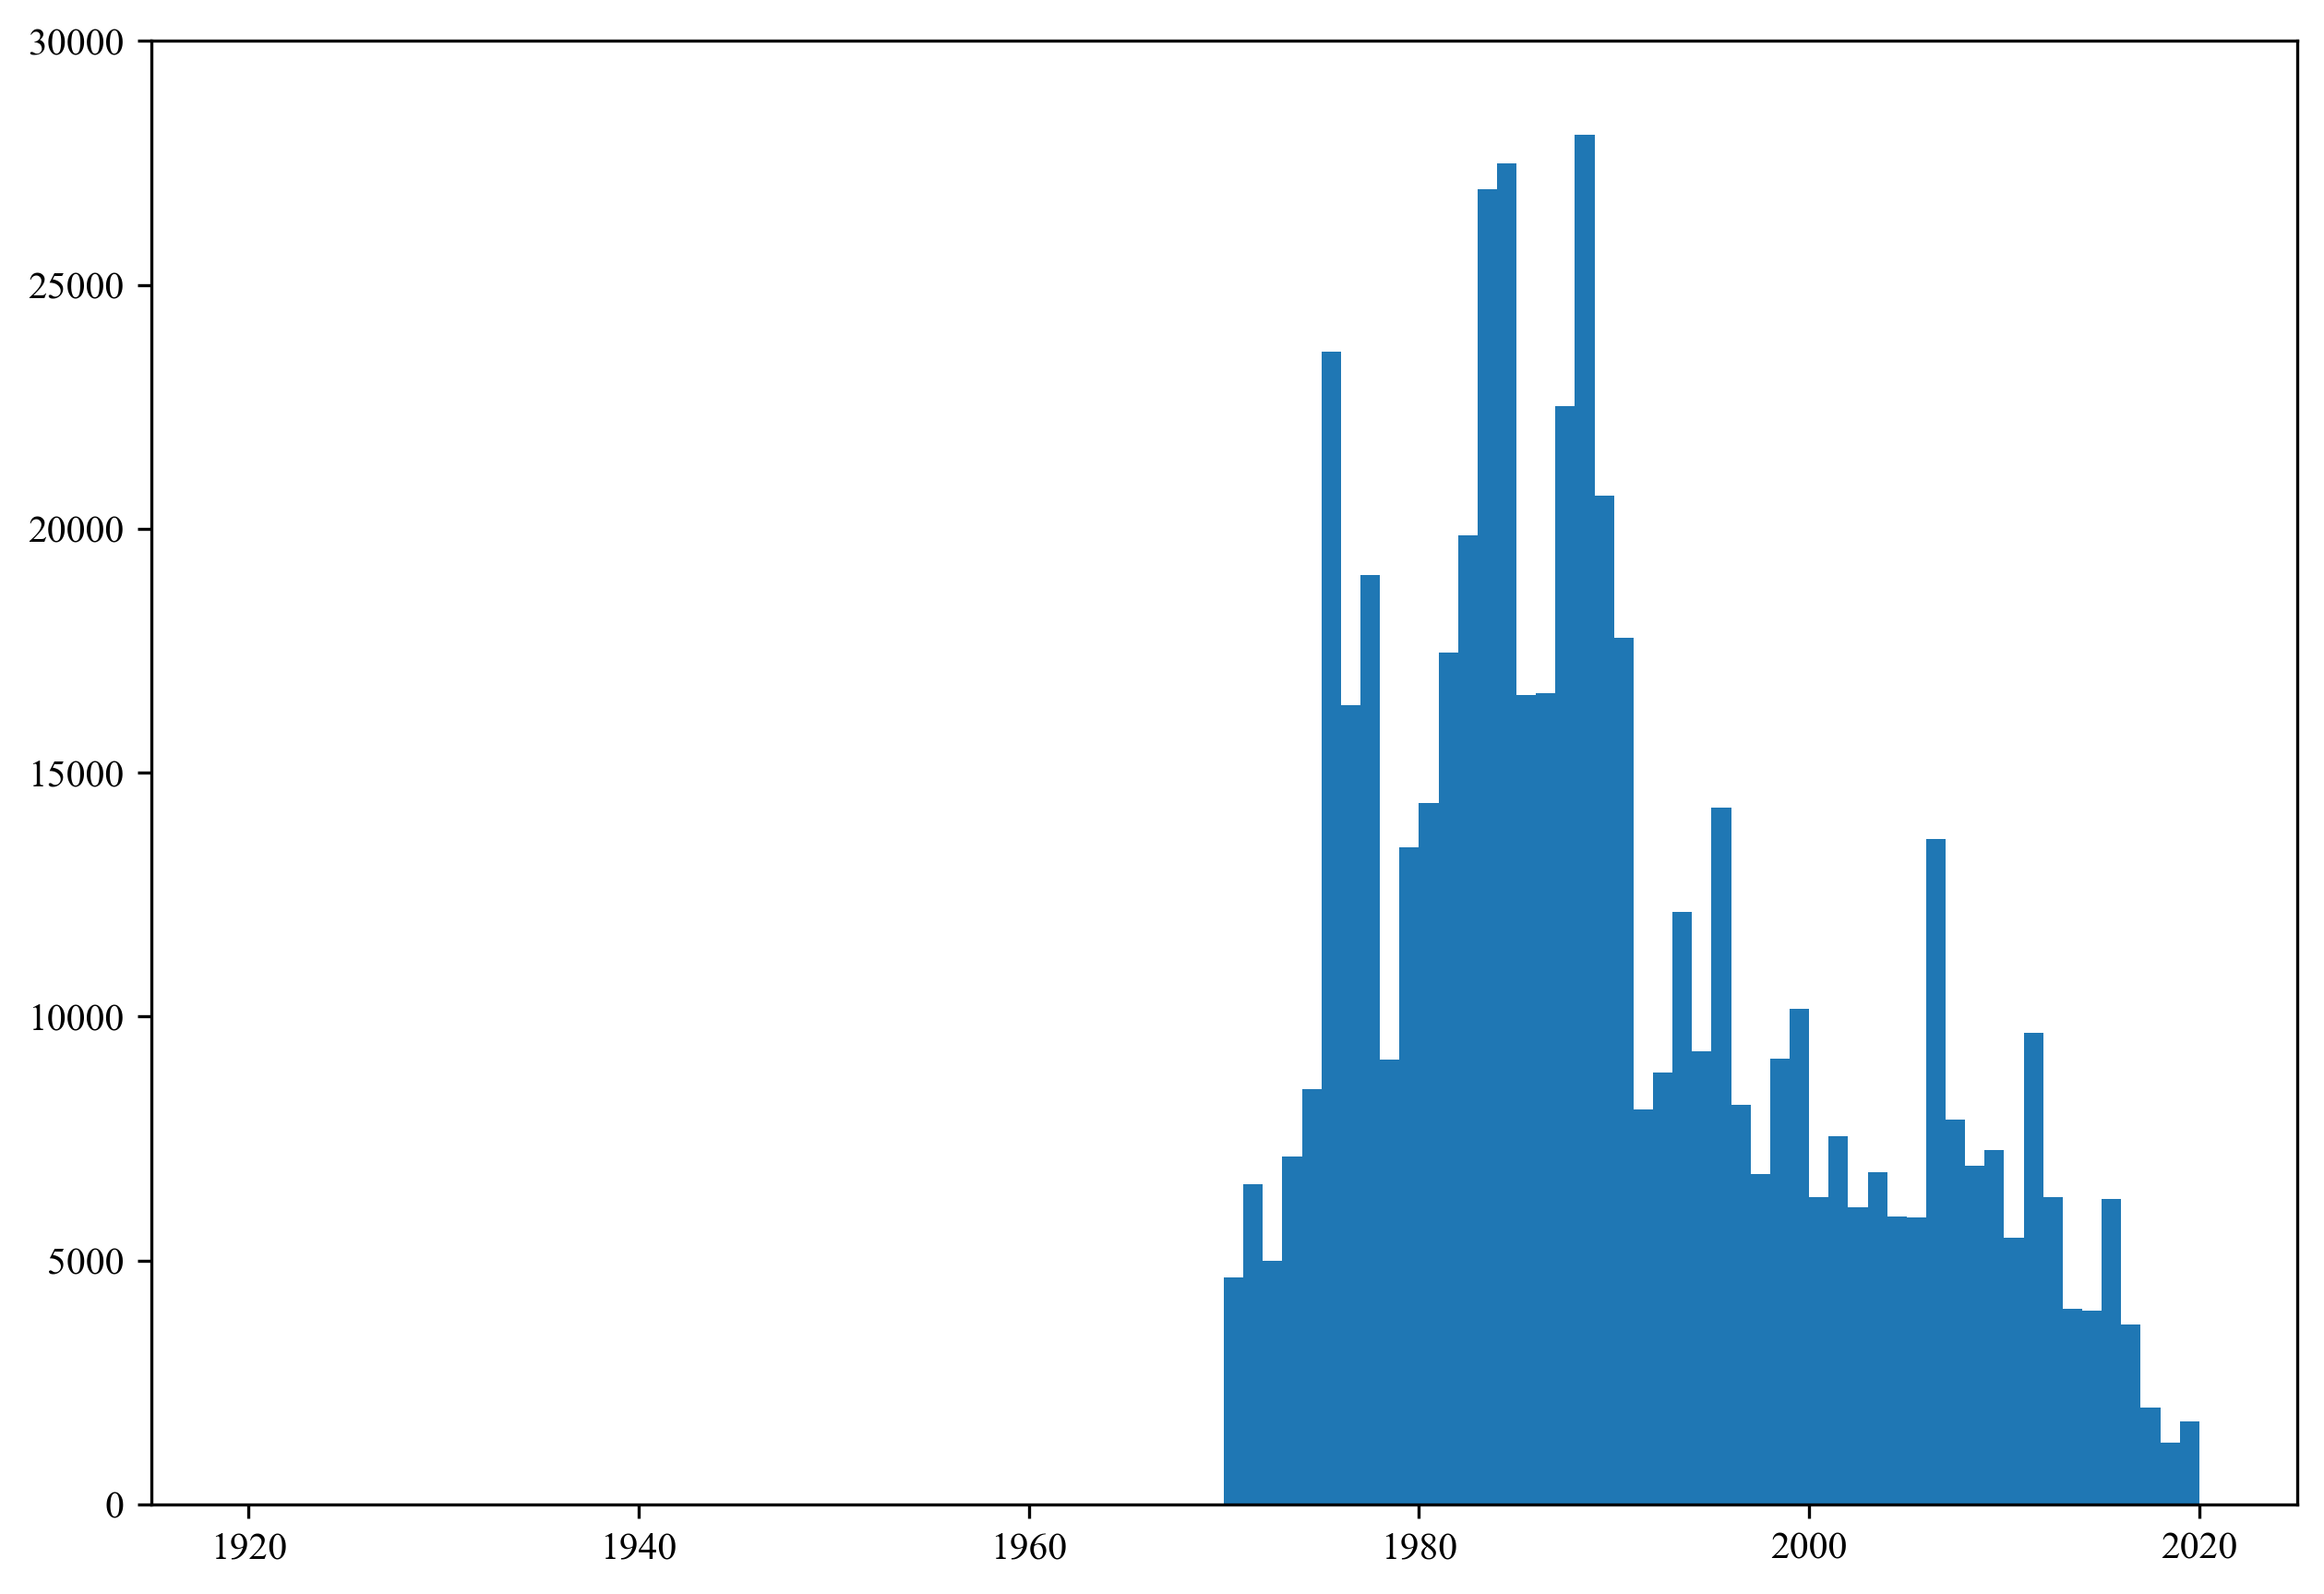

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.hist(years1, bins=np.arange(1920, 2021, 1))
ax.set_ylim(0., 30000.)
plt.savefig("../figures/histogram_residuals.jpg", dpi=300, bbox_inches="tight")
plt.show()

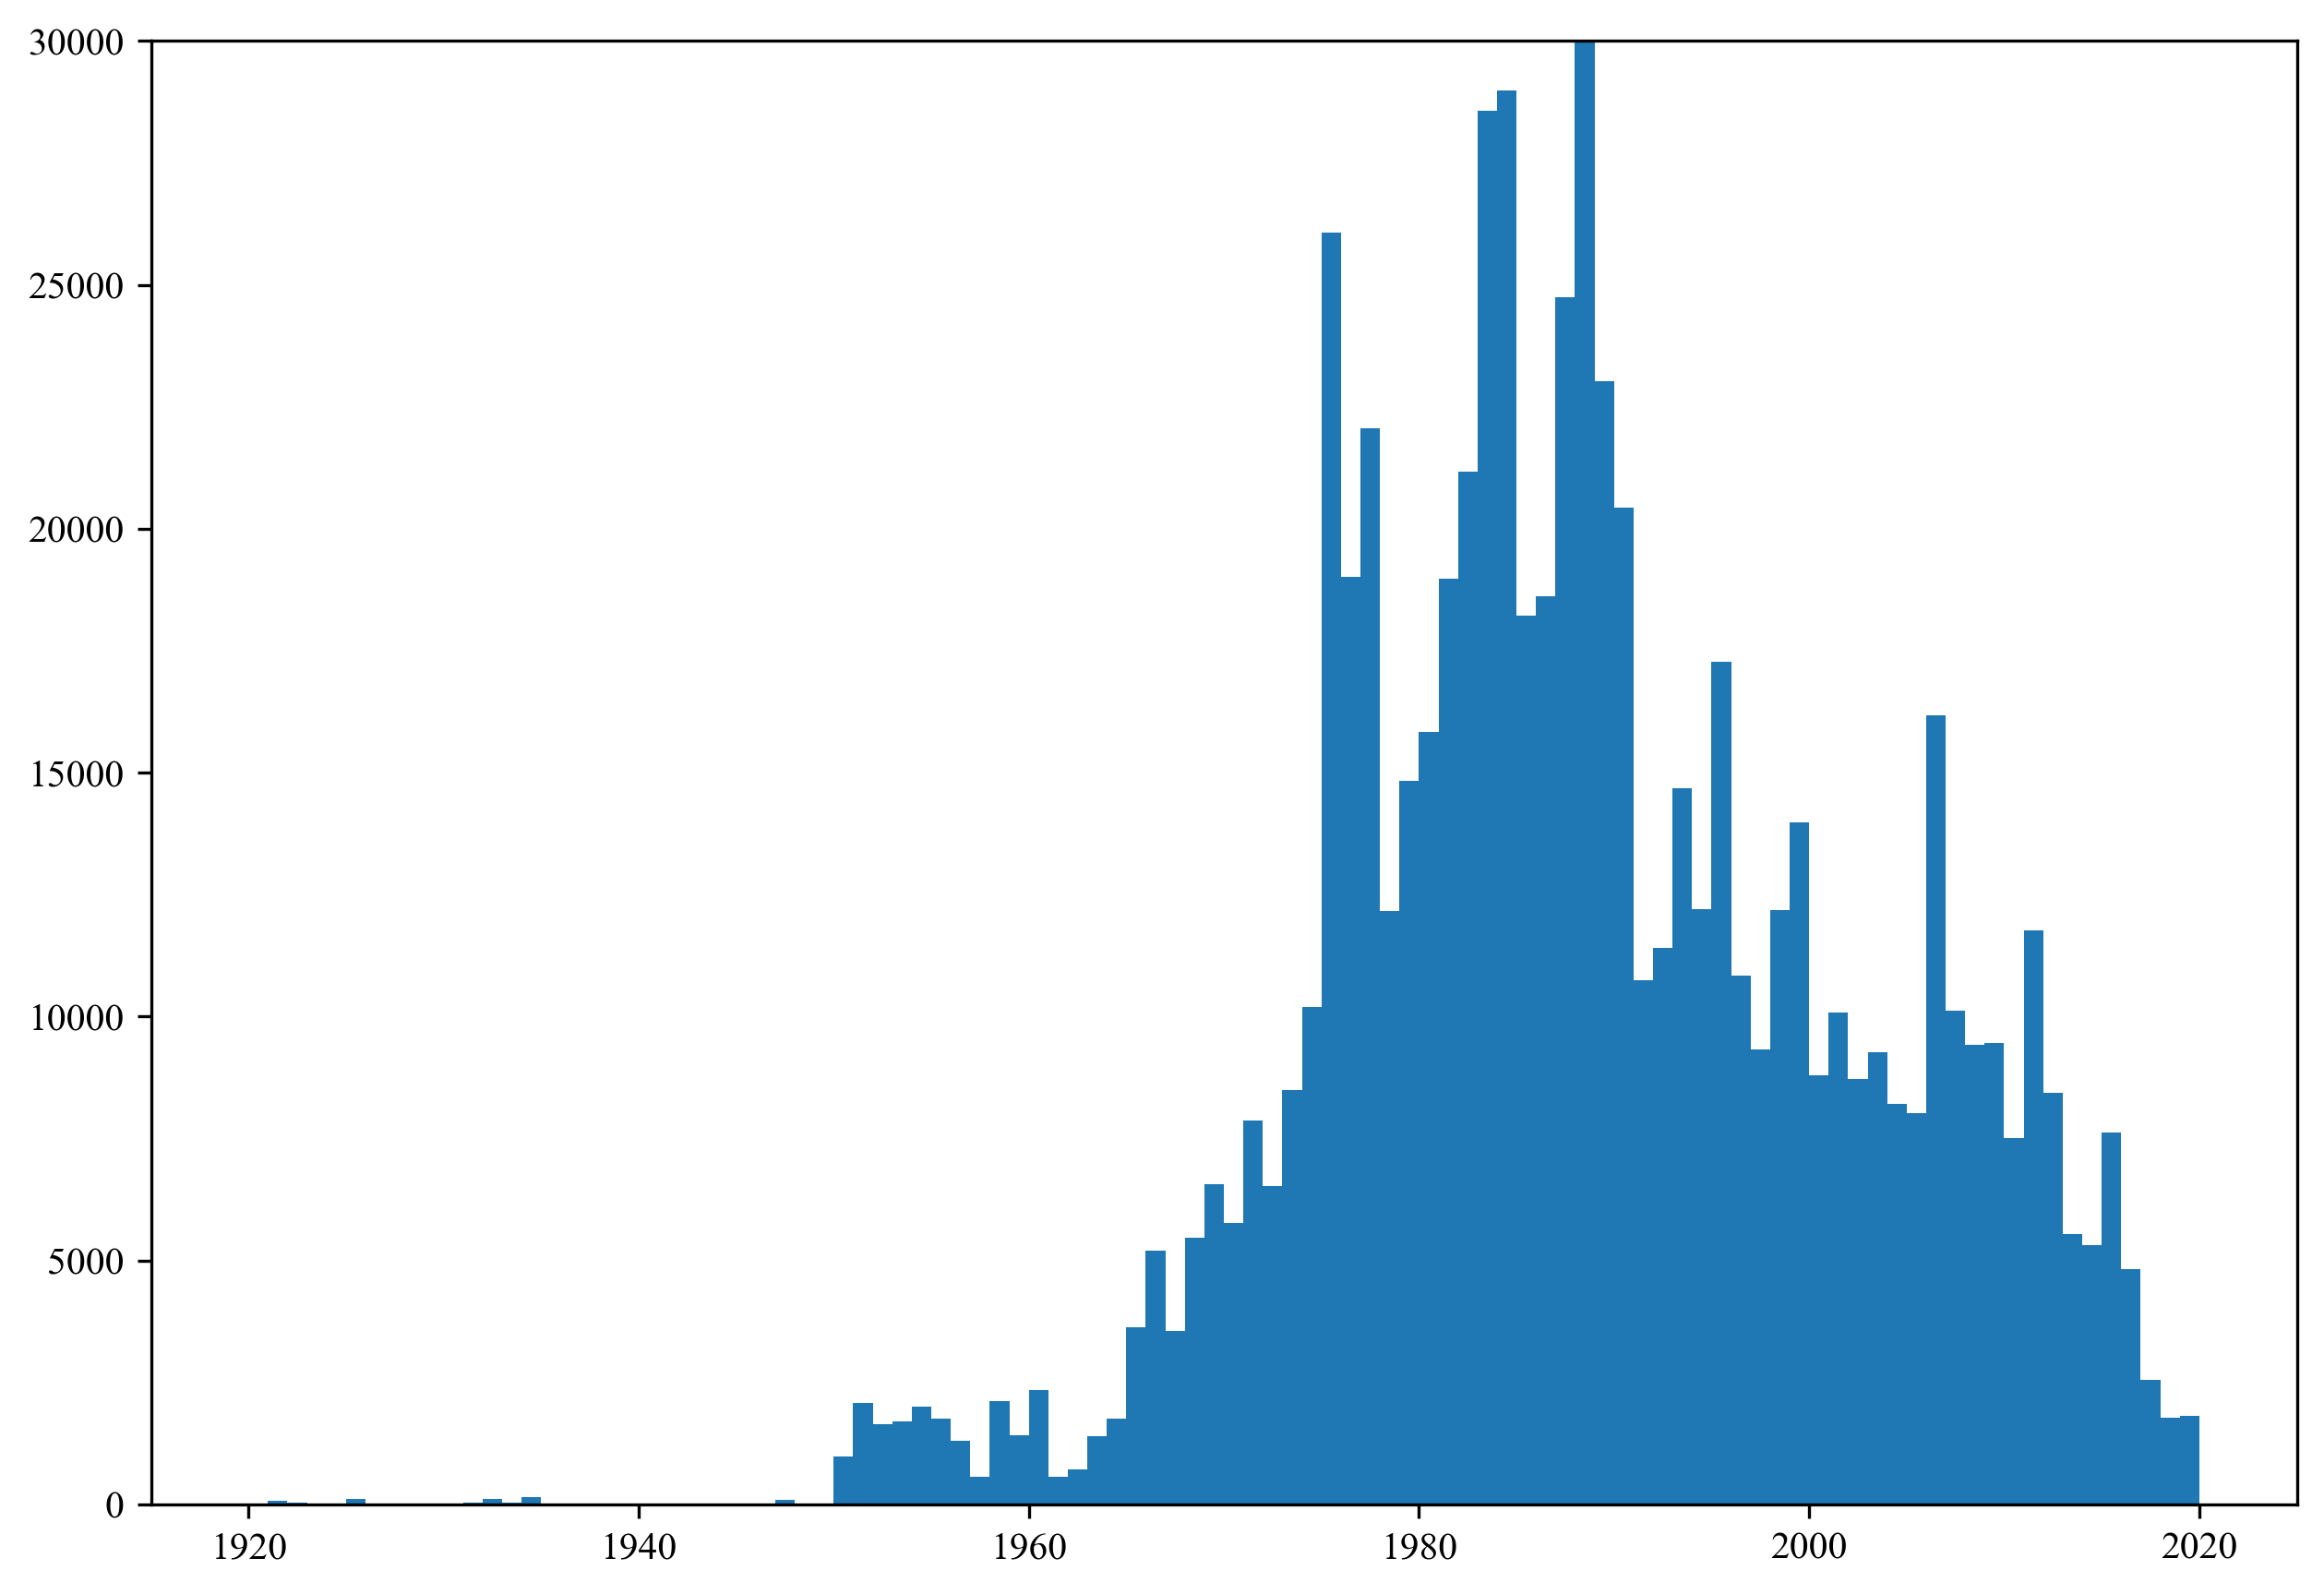

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.hist(years0, bins=np.arange(1920, 2021, 1))
ax.set_ylim(0., 30000.)
plt.savefig("../figures/histogram_netcdf.jpg", dpi=300, bbox_inches="tight")
plt.show()

## Over subdomain

In [13]:
goodmonthdepth = np.where( (months0==5) & (depth0 < 5.))[0]
domain = [0., 10., 55., 60.]
years_sel = years0[goodmonthdepth]
lon_sel = lon0[goodmonthdepth]
lat_sel = lat0[goodmonthdepth]
goodcoords = np.where( (lon_sel <= domain[1]) & (lon_sel >= domain[0]) & 
                       (lat_sel <= domain[3]) & (lat_sel >= domain[2]))[0]
years_domain = years_sel[goodcoords]

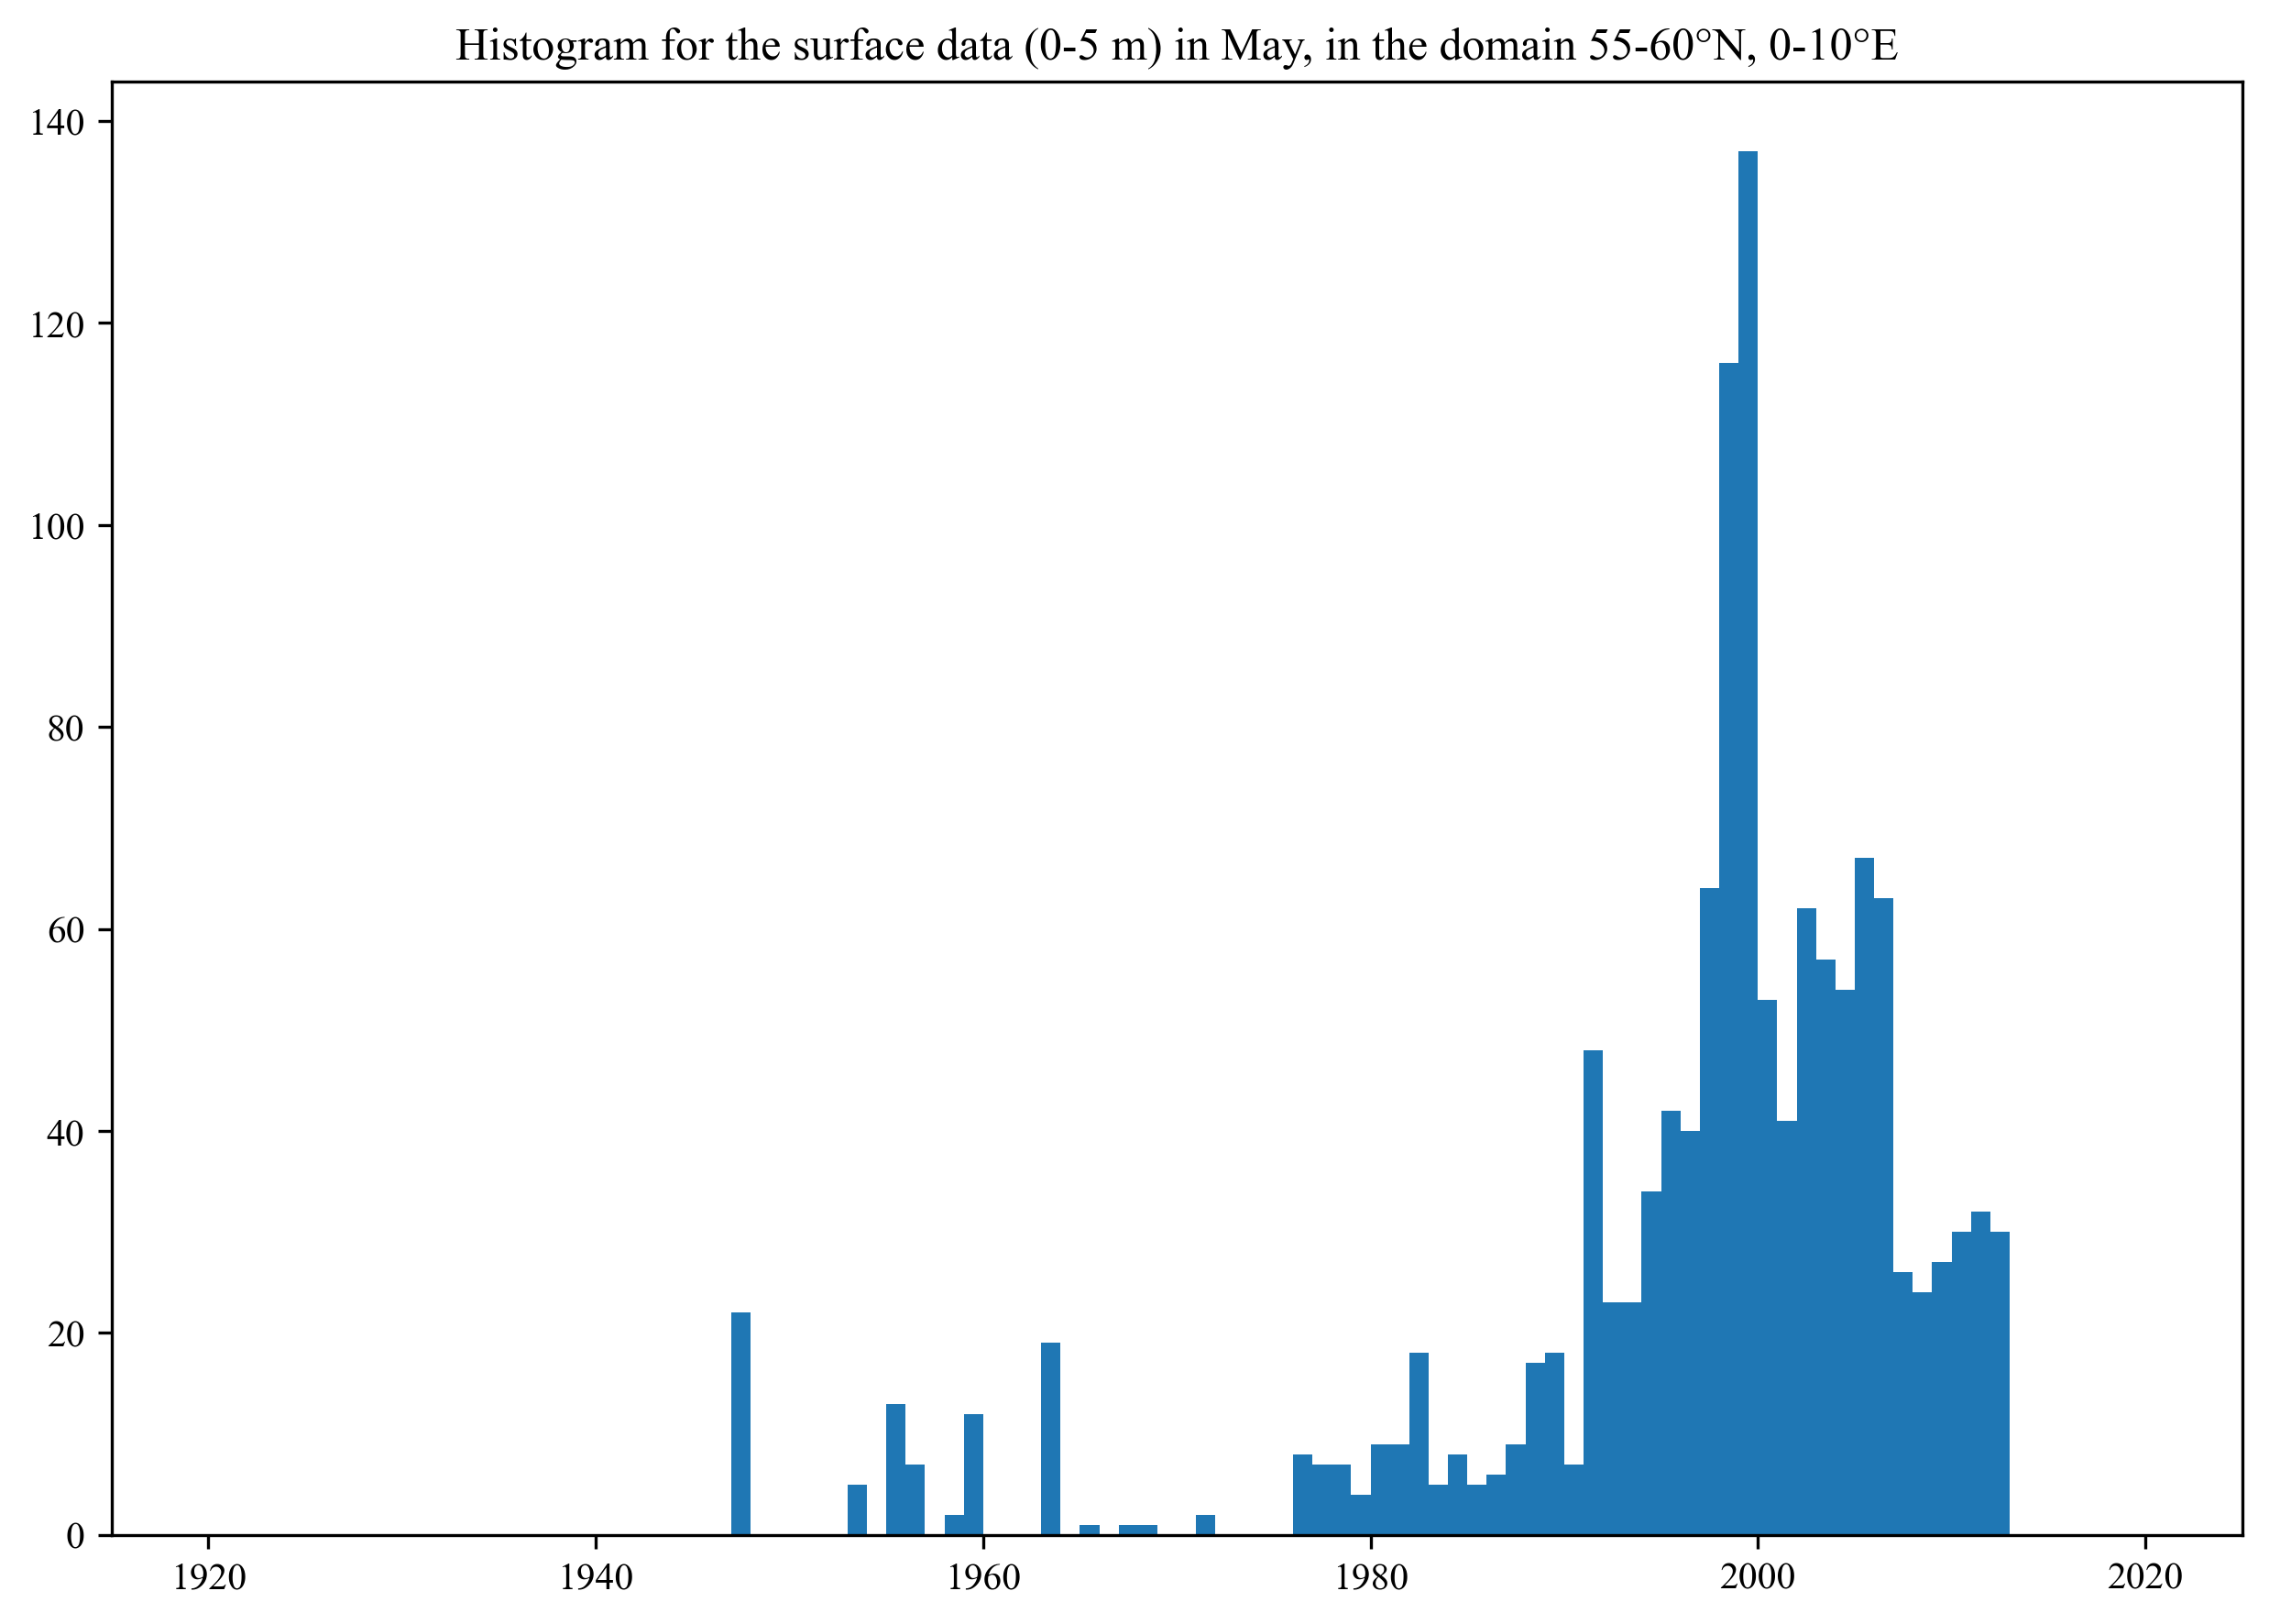

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.hist(years_domain, bins=np.arange(1920, 2021, 1))
#ax.set_ylim(0., 30000.)
plt.title("Histogram for the surface data (0-5 m) in May, in the domain 55-60°N, 0-10°E")
# plt.savefig("../figures/histogram_netcdf_may.jpg", dpi=300, bbox_inches="tight")
plt.show()